In [11]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [12]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

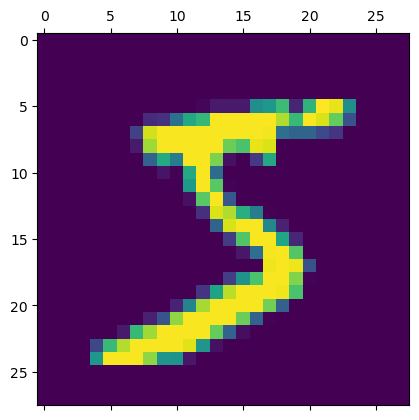

In [13]:
#to see how first image looks
plt.matshow(x_train[0])

In [14]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

C:\Users\amanp\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7377 - loss: 1.0099 - val_accuracy: 0.9014 - val_loss: 0.3652
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9006 - loss: 0.3565 - val_accuracy: 0.9156 - val_loss: 0.3029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.3084 - val_accuracy: 0.9237 - val_loss: 0.2726
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9229 - loss: 0.2723 - val_accuracy: 0.9304 - val_loss: 0.2480
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9289 - loss: 0.2457 - val_accuracy: 0.9348 - val_loss: 0.2315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9344 - loss: 0.2316 - val_accuracy: 0.9408 - val_loss: 0.2150
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9407 - loss: 0.2126 - val_accuracy: 0.9430 - val_loss: 0.2008
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9452 - loss: 0.1968 -

In [19]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1989
Loss = 0.169
Accuracy = 0.951


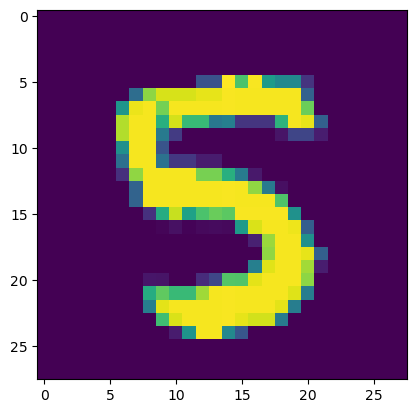

In [27]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

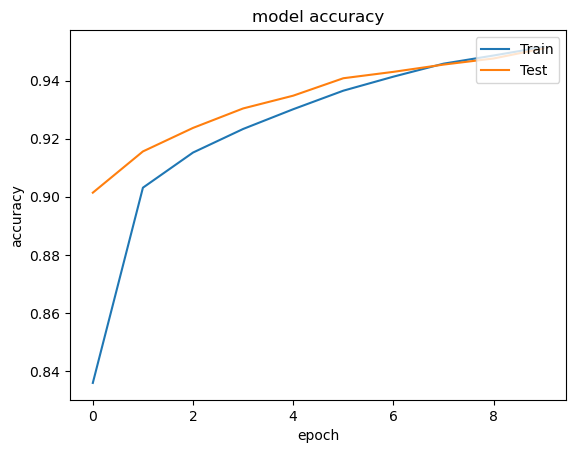

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

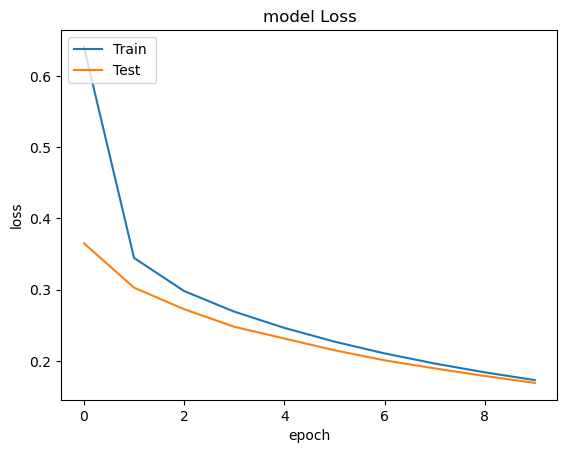

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train ' , 'Test ' ] ,loc='upper left')
plt.show()

In [21]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 966    0    1    2    0    4    4    2    1    0]
 [   0 1114    5    1    1    1    3    2    8    0]
 [   4    3  990    6    6    1    6    7    7    2]
 [   1    1   20  950    0   12    1   10   10    5]
 [   1    2    5    0  924    0   13    4    4   29]
 [   8    1    1   17    4  826   10    3   15    7]
 [   8    3    4    0    8   12  920    1    2    0]
 [   2    8   26    6    3    1    0  966    1   15]
 [   4    3    5   17    5   10    8    9  909    4]
 [   8    6    2   10   18    4    1    7    7  946]], shape=(10, 10), dtype=int32)


In [22]:
# tp
"""
about this assignement: Implementing Feed forward Neural Network with Keras and Tensorflow.

A Feed Forward Neural Network is an Artificial Neural Network (ANN) in which
the connections between nodes does not form a cycle or loop.
The input is only processed in one direction.
It is also called as Deep Feed Forward Networkd or Multilayer Perceptron.
It consists of three layers:
  Input Layer.
  Hidden Layer( if present).
  Output Layer.
Information is processed in only one direction that is from input layer to
hidden layer(s) to output layer.
The neurons are fully connected.

Stochastic Gradient Descent (SGD) is an optimization algorithm.

A loss function is a mathematical function that measures the difference between the predicted output 
of a machine learning algorithm and the actual output.
here we used sparse_categorical_crossentropy loss function

What it does ReLU introduces non-linearity to a model and outputs a value that's directly proportional to the input. The function returns 0 for negative inputs and the input value for positive inputs.  ReLU Activation Function Explained - Built InWhat Is the ReLU Activation Function? The rectified linear unit (ReLU) or rectifier activation function introduces the property of...Built InRectified Linear Units (ReLU) in Deep Learning - KaggleIntroduction. The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function return...KaggleReLU Activation Function - DremioWhat is ReLU Activation Function? The Rectified Linear Unit (ReLU) is a popular activation function predominantly used in deep lea...DremioHow it works ReLU's formula is \(f(x)=max(0,x)\).

The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes
softmax is useful for multi-class prediction, and ReLU helps overcome the vanishing gradient problem.
"""

'\nabout this assignement: Implementing Feed forward Neural Network with Keras and Tensorflow.\n\nA Feed Forward Neural Network is an Artificial Neural Network (ANN) in which\nthe connections between nodes does not form a cycle or loop.\nThe input is only processed in one direction.\nIt is also called as Deep Feed Forward Networkd or Multilayer Perceptron.\nIt consists of three layers:\n  Input Layer.\n  Hidden Layer( if present).\n  Output Layer.\nInformation is processed in only one direction that is from input layer to\nhidden layer(s) to output layer.\nThe neurons are fully connected.\n\nStochastic Gradient Descent (SGD) is an optimization algorithm.\n\nA loss function is a mathematical function that measures the difference between the predicted output \nof a machine learning algorithm and the actual output.\nhere we used sparse_categorical_crossentropy loss function\n\n\n\n\n'